In [1]:
import os
from collections import defaultdict
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
com_df = pd.read_csv("results/mapequation_com_entropy.csv", index_col=0)
com_df = com_df[["node"]+[ col for col in com_df.columns if "_ent_" in col ]]
com_df.head()

,node,weekday_com_ent_in,weekday_com_ent_out,weekend_com_ent_in,weekend_com_ent_out
ind,,,,,
0,TAMPINES EAST,0.145412,0.139498,0.184632,0.180285
1,SERANGOON CENTRAL,0.128915,0.129463,0.308747,0.314461
2,BEDOK NORTH,0.111336,0.115798,0.168210,0.155813
3,GEYLANG EAST,0.203366,0.200707,0.295818,0.283110
4,TOA PAYOH CENTRAL,0.291065,0.241715,0.612989,0.599574


In [4]:
core_df = pd.read_csv("results/k_shell_decomposition_result_entropy.csv", index_col=0)
core_df = core_df[["node"]+[ col for col in core_df.columns if "_ent_" in col ]]
core_df.head()

,node,weekday_ksc_ent_in,weekday_ksc_ent_out,weekend_ksc_ent_in,weekend_ksc_ent_out
ind,,,,,
0,ADMIRALTY,0.990890,0.771334,0.999949,0.783552
1,AIRPORT ROAD,0.665975,0.100550,0.683295,0.324450
2,ALEXANDRA HILL,0.751160,0.617682,0.778628,0.785826
3,ALEXANDRA NORTH,0.962353,0.896500,0.996685,0.961128
4,ALJUNIED,0.320833,0.406824,0.261917,0.468840


In [5]:
node_df = pd.read_csv("results/node_density_stat_normalized.csv", index_col=0)
node_df = node_df.reset_index()
node_df.head()

,node,in_degree_weekday,out_degree_weekday,PageRank_weekday,HITS_hub_weekday,HITS_authority_weekday,in_degree_weekend,out_degree_weekend,PageRank_weekend,HITS_hub_weekend,HITS_authority_weekend
0,ADMIRALTY,0.048551,0.036933,0.060612,0.028214,0.028508,0.061199,0.045808,0.067892,0.038888,0.038550
1,AIRPORT ROAD,0.006487,0.006623,0.005869,0.005507,0.005368,0.000287,0.001161,0.000182,0.000832,0.000619
2,ALEXANDRA HILL,0.130663,0.107470,0.135408,0.032508,0.047346,0.132178,0.098367,0.136138,0.039150,0.055265
3,ALEXANDRA NORTH,0.009226,0.015243,0.009854,0.004846,0.001865,0.006561,0.009277,0.006795,0.003378,0.002542
4,ALJUNIED,0.562586,0.544546,0.475933,0.416580,0.477250,0.663674,0.638384,0.547525,0.562194,0.680763


In [6]:
entropy_df = pd.merge(com_df, core_df, left_on="node", right_on="node")
entropy_df.head()

,node,weekday_com_ent_in,weekday_com_ent_out,weekend_com_ent_in,weekend_com_ent_out,weekday_ksc_ent_in,weekday_ksc_ent_out,weekend_ksc_ent_in,weekend_ksc_ent_out
0,TAMPINES EAST,0.145412,0.139498,0.184632,0.180285,0.521420,0.414627,0.540748,0.413337
1,SERANGOON CENTRAL,0.128915,0.129463,0.308747,0.314461,0.168888,0.235992,0.161001,0.365876
2,BEDOK NORTH,0.111336,0.115798,0.168210,0.155813,0.198844,0.261212,0.214296,0.297627
3,GEYLANG EAST,0.203366,0.200707,0.295818,0.283110,0.169931,0.190952,0.185727,0.199933
4,TOA PAYOH CENTRAL,0.291065,0.241715,0.612989,0.599574,0.733336,0.780115,0.721640,0.773894


In [7]:
len(entropy_df)

303

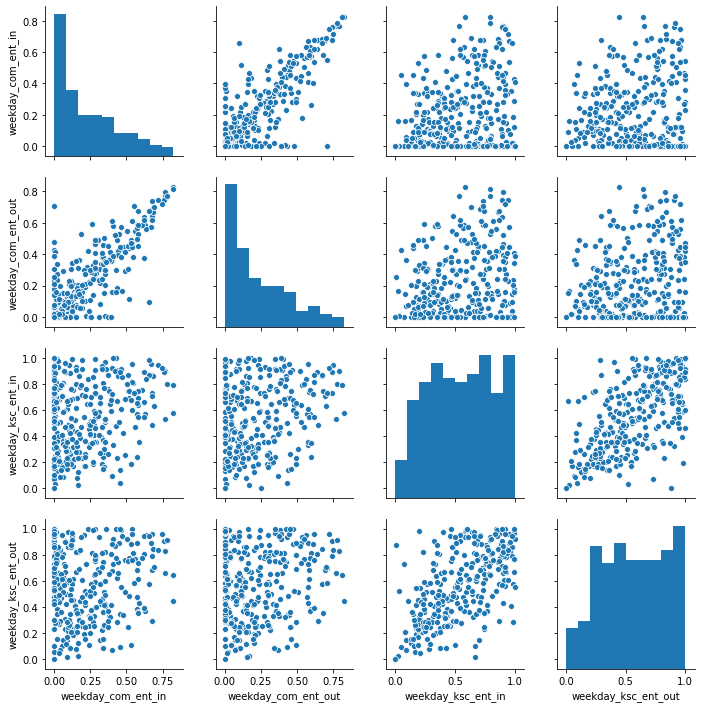

In [8]:
sns.pairplot(entropy_df[[ col for col in entropy_df.columns if "weekday" in col ]])

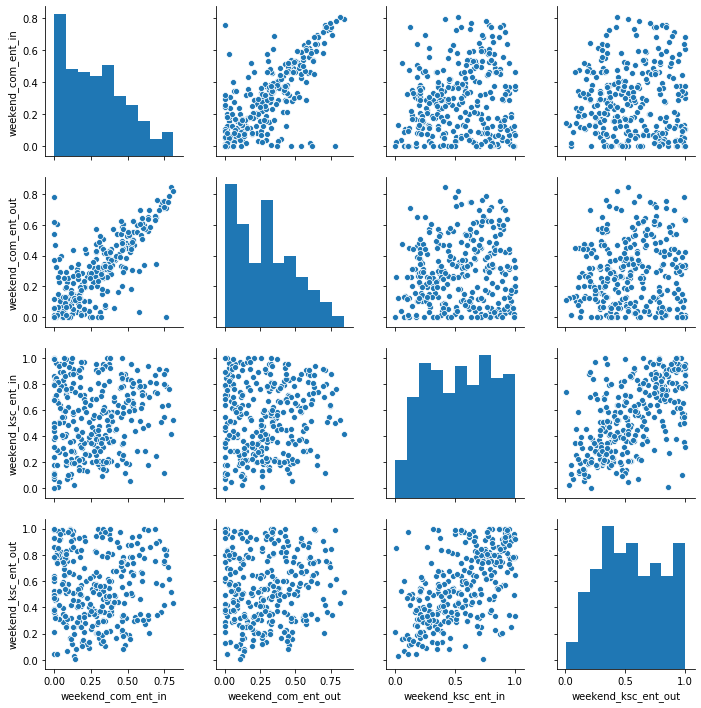

In [9]:
sns.pairplot(entropy_df[[ col for col in entropy_df.columns if "weekend" in col ]])

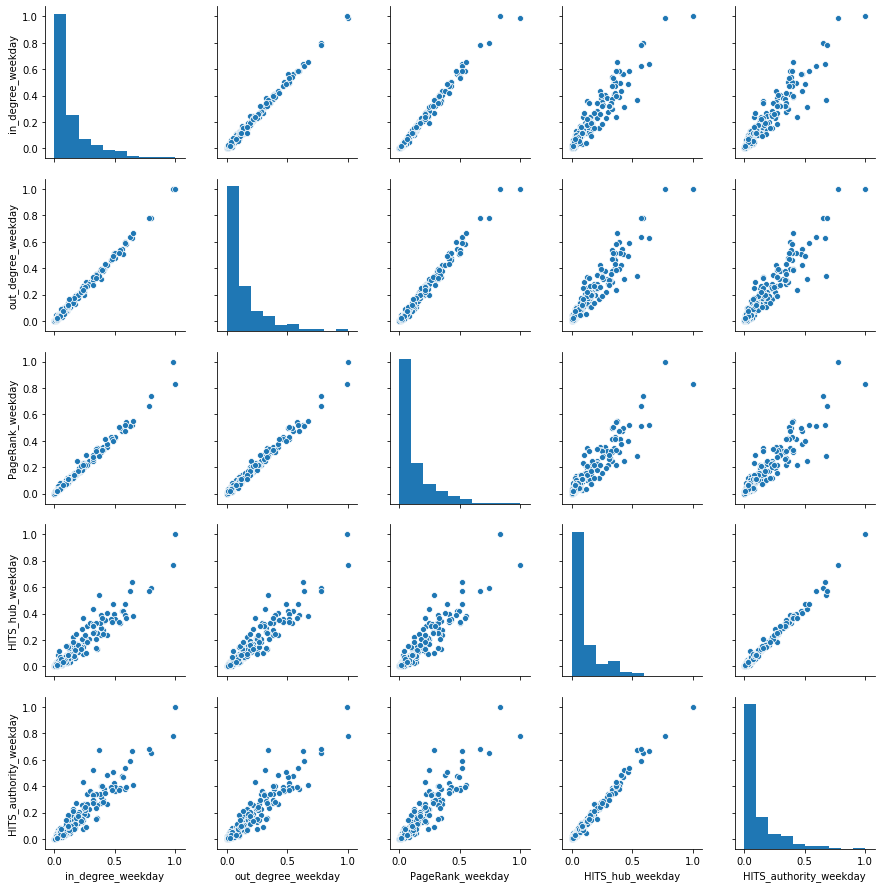

In [10]:
sns.pairplot(node_df[[ col for col in node_df.columns if "weekday" in col ]])

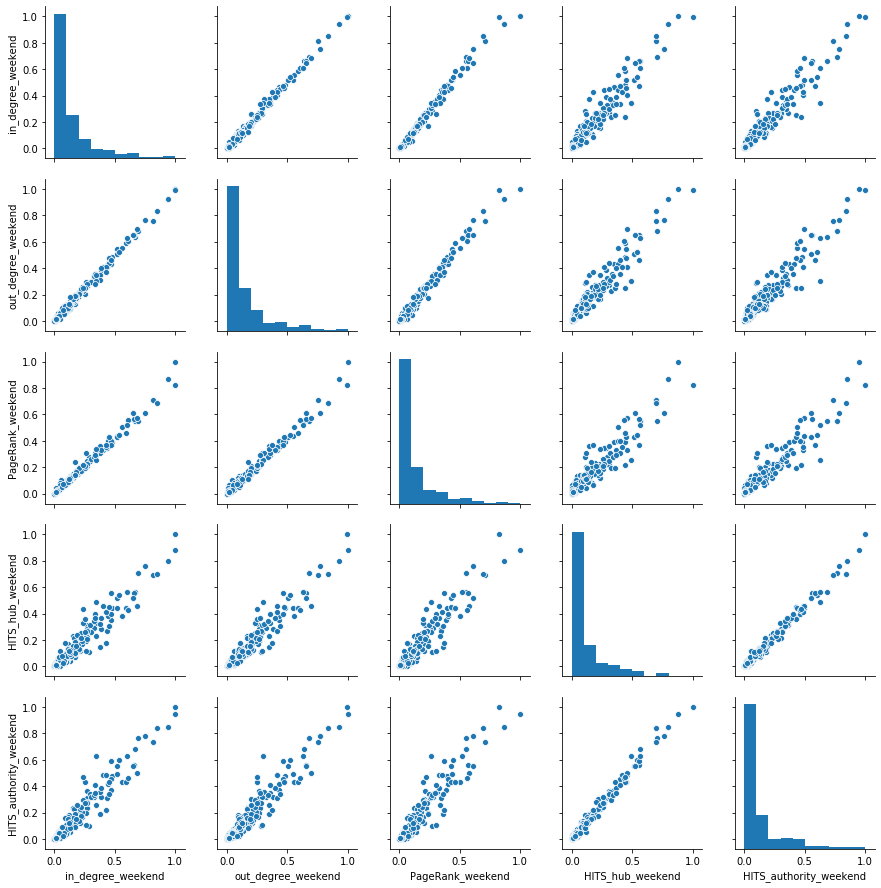

In [11]:
sns.pairplot(node_df[[ col for col in node_df.columns if "weekend" in col ]])

In [12]:
diversity_weekday = entropy_df[["node"]+[ col for col in entropy_df.columns if "weekday" in col ]]
density_weekday = node_df[["node"]+[ col for col in node_df.columns if "weekday" in col ]]
weekday_df = pd.merge(diversity_weekday, density_weekday, left_on="node", right_on="node")
print(len(weekday_df))
weekday_df.head()

303


,node,weekday_com_ent_in,weekday_com_ent_out,weekday_ksc_ent_in,weekday_ksc_ent_out,in_degree_weekday,out_degree_weekday,PageRank_weekday,HITS_hub_weekday,HITS_authority_weekday
0,TAMPINES EAST,0.145412,0.139498,0.521420,0.414627,1.000000,0.996016,0.834060,1.000000,1.000000
1,SERANGOON CENTRAL,0.128915,0.129463,0.168888,0.235992,0.651144,0.668191,0.550916,0.377478,0.406989
2,BEDOK NORTH,0.111336,0.115798,0.198844,0.261212,0.640481,0.632220,0.516571,0.640488,0.664004
3,GEYLANG EAST,0.203366,0.200707,0.169931,0.190952,0.624988,0.638307,0.516174,0.571882,0.594239
4,TOA PAYOH CENTRAL,0.291065,0.241715,0.733336,0.780115,0.588665,0.582008,0.539401,0.363780,0.392603


In [13]:
diversity_weekend = entropy_df[["node"]+[ col for col in entropy_df.columns if "weekend" in col ]]
density_weekend = node_df[["node"]+[ col for col in node_df.columns if "weekend" in col ]]
weekend_df = pd.merge(diversity_weekend, density_weekend, left_on="node", right_on="node")
print(len(weekend_df))
weekend_df.head()

303


,node,weekend_com_ent_in,weekend_com_ent_out,weekend_ksc_ent_in,weekend_ksc_ent_out,in_degree_weekend,out_degree_weekend,PageRank_weekend,HITS_hub_weekend,HITS_authority_weekend
0,TAMPINES EAST,0.184632,0.180285,0.540748,0.413337,0.995691,0.993142,0.823435,1.000000,1.000000
1,SERANGOON CENTRAL,0.308747,0.314461,0.161001,0.365876,0.687355,0.698306,0.575744,0.453837,0.497627
2,BEDOK NORTH,0.168210,0.155813,0.214296,0.297627,0.692633,0.678745,0.549444,0.708411,0.767952
3,GEYLANG EAST,0.295818,0.283110,0.185727,0.199933,0.750233,0.767627,0.613571,0.762635,0.781929
4,TOA PAYOH CENTRAL,0.612989,0.599574,0.721640,0.773894,0.609566,0.608306,0.557793,0.429440,0.463202


In [14]:
weekday_df.columns

Index(['node', 'weekday_com_ent_in', 'weekday_com_ent_out',
       'weekday_ksc_ent_in', 'weekday_ksc_ent_out', 'in_degree_weekday',
       'out_degree_weekday', 'PageRank_weekday', 'HITS_hub_weekday',
       'HITS_authority_weekday'],
      dtype='object')

In [15]:
weekday_spread = weekday_df[['node', 'weekday_com_ent_out', 'weekday_ksc_ent_out', 'out_degree_weekday', 'HITS_hub_weekday', 'PageRank_weekday', ]]
weekend_spread = weekend_df[['node', 'weekend_com_ent_out', 'weekend_ksc_ent_out', 'out_degree_weekend', 'HITS_hub_weekend', 'PageRank_weekend', ]]

In [16]:
weekday_receiv = weekday_df[['node', 'weekday_com_ent_in', 'weekday_ksc_ent_in', 'in_degree_weekday', 'HITS_authority_weekday', 'PageRank_weekday', ]]
weekend_receiv = weekend_df[['node', 'weekend_com_ent_in', 'weekend_ksc_ent_in', 'in_degree_weekend', 'HITS_authority_weekend', 'PageRank_weekend', ]]

In [17]:
weekday_spread_node = weekday_spread["node"]
weekday_spread_1 = (weekday_spread["weekday_com_ent_out"] * weekday_spread["weekday_ksc_ent_out"] * weekday_spread["out_degree_weekday"])**(1./3.)
weekday_spread_2 = (weekday_spread["weekday_com_ent_out"] * weekday_spread["weekday_ksc_ent_out"] * weekday_spread["HITS_hub_weekday"])**(1./3.)
weekday_spread_3 = (weekday_spread["weekday_com_ent_out"] * weekday_spread["weekday_ksc_ent_out"] * weekday_spread["PageRank_weekday"])**(1./3.)

weekday_spread_res = pd.DataFrame({"node": weekday_spread_node, "cal_dc": weekday_spread_1, "cal_hh": weekday_spread_2, "cal_pr": weekday_spread_3})
weekday_spread_res.head()

,node,cal_dc,cal_hh,cal_pr
0,TAMPINES EAST,0.386216,0.386730,0.364033
1,SERANGOON CENTRAL,0.273305,0.225932,0.256277
2,BEDOK NORTH,0.267416,0.268577,0.250001
3,GEYLANG EAST,0.290295,0.279854,0.270455
4,TOA PAYOH CENTRAL,0.478774,0.409355,0.466794


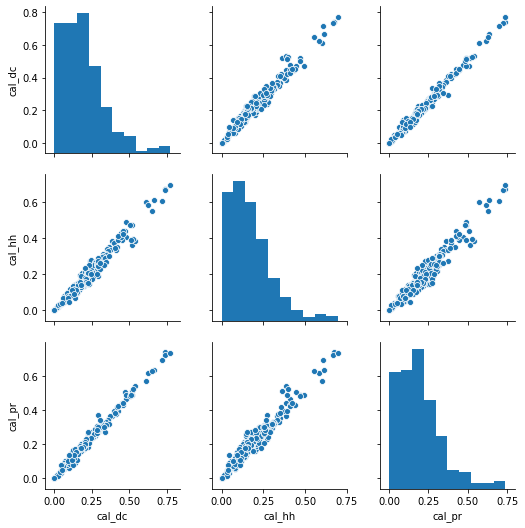

In [18]:
sns.pairplot(weekday_spread_res)

In [19]:
weekday_spread_res.corr()

,cal_dc,cal_hh,cal_pr
cal_dc,1.000000,0.986056,0.994840
cal_hh,0.986056,1.000000,0.978665
cal_pr,0.994840,0.978665,1.000000


In [20]:
weekend_spread_node = weekend_spread["node"]
weekend_spread_1 = (weekend_spread["weekend_com_ent_out"] * weekend_spread["weekend_ksc_ent_out"] * weekend_spread["out_degree_weekend"])**(1./3.)
weekend_spread_2 = (weekend_spread["weekend_com_ent_out"] * weekend_spread["weekend_ksc_ent_out"] * weekend_spread["HITS_hub_weekend"])**(1./3.)
weekend_spread_3 = (weekend_spread["weekend_com_ent_out"] * weekend_spread["weekend_ksc_ent_out"] * weekend_spread["PageRank_weekend"])**(1./3.)

weekend_spread_res = pd.DataFrame({"node": weekend_spread_node, "cal_dc": weekend_spread_1, "cal_hh": weekend_spread_2, "cal_pr": weekend_spread_3})
weekend_spread_res.head()

,node,cal_dc,cal_hh,cal_pr
0,TAMPINES EAST,0.419848,0.420812,0.394425
1,SERANGOON CENTRAL,0.431501,0.373766,0.404616
2,BEDOK NORTH,0.315739,0.320273,0.294261
3,GEYLANG EAST,0.351558,0.350794,0.326263
4,TOA PAYOH CENTRAL,0.655967,0.584085,0.637284


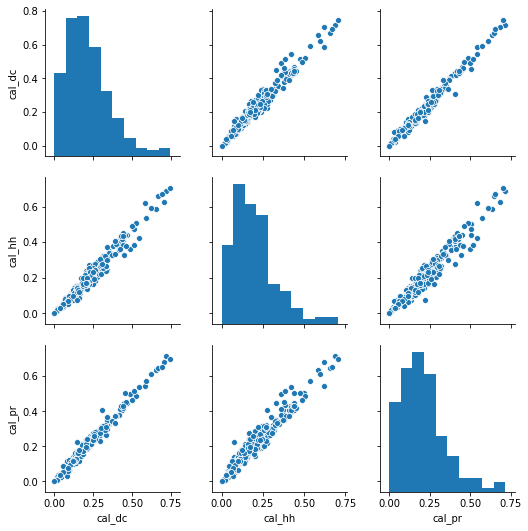

In [21]:
sns.pairplot(weekend_spread_res)

In [22]:
weekend_spread_res.corr()

,cal_dc,cal_hh,cal_pr
cal_dc,1.000000,0.983288,0.992490
cal_hh,0.983288,1.000000,0.971922
cal_pr,0.992490,0.971922,1.000000


In [23]:
weekday_receiv_node = weekday_receiv["node"]
weekday_receiv_1 = (weekday_receiv["weekday_com_ent_in"] * weekday_receiv["weekday_ksc_ent_in"] * weekday_receiv["in_degree_weekday"])**(1./3.)
weekday_receiv_2 = (weekday_receiv["weekday_com_ent_in"] * weekday_receiv["weekday_ksc_ent_in"] * weekday_receiv["HITS_authority_weekday"])**(1./3.)
weekday_receiv_3 = (weekday_receiv["weekday_com_ent_in"] * weekday_receiv["weekday_ksc_ent_in"] * weekday_receiv["PageRank_weekday"])**(1./3.)

weekday_receiv_res = pd.DataFrame({"node": weekday_receiv_node, "cal_dc": weekday_receiv_1, "cal_ha": weekday_receiv_2, "cal_pr": weekday_receiv_3})
weekday_receiv_res.head()

,node,cal_dc,cal_ha,cal_pr
0,TAMPINES EAST,0.423249,0.423249,0.398408
1,SERANGOON CENTRAL,0.242025,0.206932,0.228909
2,BEDOK NORTH,0.242039,0.244966,0.225299
3,GEYLANG EAST,0.278489,0.273845,0.261286
4,TOA PAYOH CENTRAL,0.500865,0.437605,0.486484


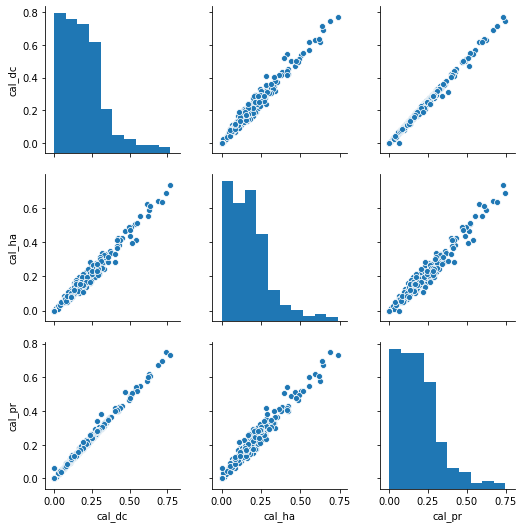

In [24]:
sns.pairplot(weekday_receiv_res)

In [25]:
weekday_receiv_res.corr()

,cal_dc,cal_ha,cal_pr
cal_dc,1.000000,0.986710,0.997344
cal_ha,0.986710,1.000000,0.980337
cal_pr,0.997344,0.980337,1.000000


In [26]:
weekend_receiv_node = weekend_receiv["node"]
weekend_receiv_1 = (weekend_receiv["weekend_com_ent_in"] * weekend_receiv["weekend_ksc_ent_in"] * weekend_receiv["in_degree_weekend"])**(1./3.)
weekend_receiv_2 = (weekend_receiv["weekend_com_ent_in"] * weekend_receiv["weekend_ksc_ent_in"] * weekend_receiv["HITS_authority_weekend"])**(1./3.)
weekend_receiv_3 = (weekend_receiv["weekend_com_ent_in"] * weekend_receiv["weekend_ksc_ent_in"] * weekend_receiv["PageRank_weekend"])**(1./3.)

weekend_receiv_res = pd.DataFrame({"node": weekend_receiv_node, "cal_dc": weekend_receiv_1, "cal_ha": weekend_receiv_2, "cal_pr": weekend_receiv_3})
weekend_receiv_res.head()

,node,cal_dc,cal_ha,cal_pr
0,TAMPINES EAST,0.463243,0.463910,0.434821
1,SERANGOON CENTRAL,0.324492,0.291370,0.305882
2,BEDOK NORTH,0.292274,0.302506,0.270560
3,GEYLANG EAST,0.345434,0.350232,0.323039
4,TOA PAYOH CENTRAL,0.646048,0.589542,0.627213


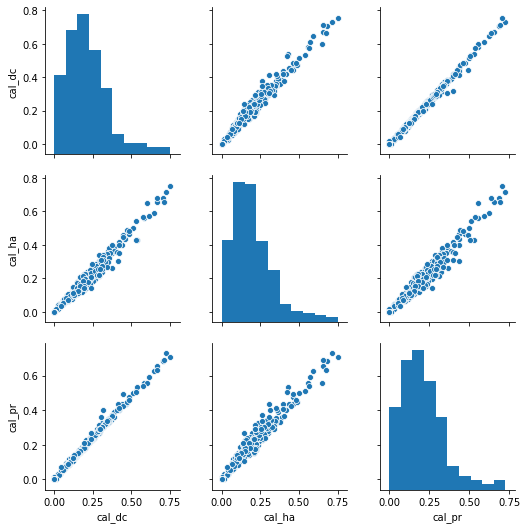

In [27]:
sns.pairplot(weekend_receiv_res)

In [28]:
weekend_receiv_res.corr()

,cal_dc,cal_ha,cal_pr
cal_dc,1.000000,0.983704,0.996689
cal_ha,0.983704,1.000000,0.975618
cal_pr,0.996689,0.975618,1.000000


In [29]:
weekday_res = pd.merge(weekday_spread_res, weekday_receiv_res, left_on="node", right_on="node", suffixes=("_spreader", "_receiver"))
print(len(weekday_res))
weekday_res.head()

303


,node,cal_dc_spreader,cal_hh,cal_pr_spreader,cal_dc_receiver,cal_ha,cal_pr_receiver
0,TAMPINES EAST,0.386216,0.386730,0.364033,0.423249,0.423249,0.398408
1,SERANGOON CENTRAL,0.273305,0.225932,0.256277,0.242025,0.206932,0.228909
2,BEDOK NORTH,0.267416,0.268577,0.250001,0.242039,0.244966,0.225299
3,GEYLANG EAST,0.290295,0.279854,0.270455,0.278489,0.273845,0.261286
4,TOA PAYOH CENTRAL,0.478774,0.409355,0.466794,0.500865,0.437605,0.486484


In [30]:
weekend_res = pd.merge(weekend_spread_res, weekend_receiv_res, left_on="node", right_on="node", suffixes=("_spreader", "_receiver"))
print(len(weekend_res))
weekend_res.head()

303


,node,cal_dc_spreader,cal_hh,cal_pr_spreader,cal_dc_receiver,cal_ha,cal_pr_receiver
0,TAMPINES EAST,0.419848,0.420812,0.394425,0.463243,0.463910,0.434821
1,SERANGOON CENTRAL,0.431501,0.373766,0.404616,0.324492,0.291370,0.305882
2,BEDOK NORTH,0.315739,0.320273,0.294261,0.292274,0.302506,0.270560
3,GEYLANG EAST,0.351558,0.350794,0.326263,0.345434,0.350232,0.323039
4,TOA PAYOH CENTRAL,0.655967,0.584085,0.637284,0.646048,0.589542,0.627213


In [31]:
weekday_res.to_csv("results/Super_SR_weekday.csv", index_label="ind")
weekend_res.to_csv("results/Super_SR_weekend.csv", index_label="ind")